In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

%matplotlib inline

In [2]:
# Read in the CSV file with low_memory=False
df = pd.read_csv('Conversation Responses.csv', low_memory=False)

# Print the dataframe to verify the data types
df.head()


,user_id,from_email,body_text,conversation_timestamp,ticket_created,email
0,6.900887e+10,microsoftexchange329e71ec88ae4615bbc36ab6ce411...,[https://products.office.com/en-us/CMSImages/O...,2023-02-23 10:37:26 UTC,2023-02-23 06:58:40 UTC,oluseguneammanuel98@gmail.com
1,6.903538e+10,"""Customer Experience"" <support@sparkle.ng>","Hi Sparkler, Thank you for contacting us ...",2023-02-23 10:37:08 UTC,2023-02-23 07:18:06 UTC,nibsssupport@nibss-plc.com.ng
2,6.903538e+10,"""Customer Experience"" <support@sparkle.ng>","Hi Sparkler, Thank you for contacting us ...",2023-02-23 10:37:10 UTC,2023-02-23 08:16:55 UTC,adorbeshel19@gmail.com
3,6.903538e+10,"""Customer Experience"" <support@sparkle.ng>","Hi Sparkler, Thank you for contacting us ...",2023-02-23 10:37:06 UTC,2023-02-23 06:58:40 UTC,oluseguneammanuel98@gmail.com
4,6.903538e+10,"""Customer Experience"" <support@sparkle.ng>","Hi Sparkler, Thank you for contacting us ...",2023-02-23 10:37:10 UTC,2023-02-23 07:59:46 UTC,yokodondo@gmail.com


In [3]:
df.tail()

,user_id,from_email,body_text,conversation_timestamp,ticket_created,email
235503,6.902687e+10,blessing.aludo@woven.finance,"Hi Team,\r\n\r\nThanks for reaching out.\r\n\r...",2022-06-03 13:46:44 UTC,2022-05-26 09:03:19 UTC,ogunmuyiwaomowunmi65@gmail.com
235504,6.902687e+10,blessing.aludo@woven.finance,"Hi Team,\r\n\r\nThanks for your response.\r\n\...",2022-06-10 11:55:55 UTC,2022-05-26 09:03:19 UTC,ogunmuyiwaomowunmi65@gmail.com
235505,6.902687e+10,blessing.aludo@woven.finance,"Hi Team,\r\n\r\nThe transaction has been confi...",2022-06-13 08:41:23 UTC,2022-05-26 09:03:19 UTC,ogunmuyiwaomowunmi65@gmail.com
235506,6.901553e+10,victor.onwubiko@wemabank.com,"Dear Team,\r\n\r\nKindly reconfirm account det...",2022-08-17 21:14:03 UTC,2022-08-16 10:20:16 UTC,frauddesk@vfd-mfb.com
235507,6.902999e+10,tosin.fatanmi@palmpay-inc.com,Dear Sparkle Team\n\nKindly note that a refund...,2022-05-10 12:40:40 UTC,2022-04-21 12:34:38 UTC,tosin.adenekan@palmpay.co


In [4]:
df['from_email'].head(5)

0    microsoftexchange329e71ec88ae4615bbc36ab6ce411...
1           "Customer Experience" <support@sparkle.ng>
2           "Customer Experience" <support@sparkle.ng>
3           "Customer Experience" <support@sparkle.ng>
4           "Customer Experience" <support@sparkle.ng>
Name: from_email, dtype: object

In [5]:
for column in df.columns:
    print(column)

user_id
from_email
body_text
conversation_timestamp
ticket_created
email


In [6]:
df.shape

(235508, 6)

In [7]:
df.isna().sum()

user_id                     6310
from_email                114128
body_text                   1564
conversation_timestamp         0
ticket_created                 0
email                      12112
dtype: int64

In [8]:
# fill empty cells in column 'A' with 'a'
df['from_email'].fillna('a', inplace=True)

# print the updated dataframe
df


,user_id,from_email,body_text,conversation_timestamp,ticket_created,email
0,6.900887e+10,microsoftexchange329e71ec88ae4615bbc36ab6ce411...,[https://products.office.com/en-us/CMSImages/O...,2023-02-23 10:37:26 UTC,2023-02-23 06:58:40 UTC,oluseguneammanuel98@gmail.com
1,6.903538e+10,"""Customer Experience"" <support@sparkle.ng>","Hi Sparkler, Thank you for contacting us ...",2023-02-23 10:37:08 UTC,2023-02-23 07:18:06 UTC,nibsssupport@nibss-plc.com.ng
2,6.903538e+10,"""Customer Experience"" <support@sparkle.ng>","Hi Sparkler, Thank you for contacting us ...",2023-02-23 10:37:10 UTC,2023-02-23 08:16:55 UTC,adorbeshel19@gmail.com
3,6.903538e+10,"""Customer Experience"" <support@sparkle.ng>","Hi Sparkler, Thank you for contacting us ...",2023-02-23 10:37:06 UTC,2023-02-23 06:58:40 UTC,oluseguneammanuel98@gmail.com
4,6.903538e+10,"""Customer Experience"" <support@sparkle.ng>","Hi Sparkler, Thank you for contacting us ...",2023-02-23 10:37:10 UTC,2023-02-23 07:59:46 UTC,yokodondo@gmail.com
...,...,...,...,...,...,...
235503,6.902687e+10,blessing.aludo@woven.finance,"Hi Team,\r\n\r\nThanks for reaching out.\r\n\r...",2022-06-03 13:46:44 UTC,2022-05-26 09:03:19 UTC,ogunmuyiwaomowunmi65@gmail.com
235504,6.902687e+10,blessing.aludo@woven.finance,"Hi Team,\r\n\r\nThanks for your response.\r\n\...",2022-06-10 11:55:55 UTC,2022-05-26 09:03:19 UTC,ogunmuyiwaomowunmi65@gmail.com
235505,6.902687e+10,blessing.aludo@woven.finance,"Hi Team,\r\n\r\nThe transaction has been confi...",2022-06-13 08:41:23 UTC,2022-05-26 09:03:19 UTC,ogunmuyiwaomowunmi65@gmail.com
235506,6.901553e+10,victor.onwubiko@wemabank.com,"Dear Team,\r\n\r\nKindly reconfirm account det...",2022-08-17 21:14:03 UTC,2022-08-16 10:20:16 UTC,frauddesk@vfd-mfb.com


In [9]:
df[df['from_email'] == 'a']
df

,user_id,from_email,body_text,conversation_timestamp,ticket_created,email
0,6.900887e+10,microsoftexchange329e71ec88ae4615bbc36ab6ce411...,[https://products.office.com/en-us/CMSImages/O...,2023-02-23 10:37:26 UTC,2023-02-23 06:58:40 UTC,oluseguneammanuel98@gmail.com
1,6.903538e+10,"""Customer Experience"" <support@sparkle.ng>","Hi Sparkler, Thank you for contacting us ...",2023-02-23 10:37:08 UTC,2023-02-23 07:18:06 UTC,nibsssupport@nibss-plc.com.ng
2,6.903538e+10,"""Customer Experience"" <support@sparkle.ng>","Hi Sparkler, Thank you for contacting us ...",2023-02-23 10:37:10 UTC,2023-02-23 08:16:55 UTC,adorbeshel19@gmail.com
3,6.903538e+10,"""Customer Experience"" <support@sparkle.ng>","Hi Sparkler, Thank you for contacting us ...",2023-02-23 10:37:06 UTC,2023-02-23 06:58:40 UTC,oluseguneammanuel98@gmail.com
4,6.903538e+10,"""Customer Experience"" <support@sparkle.ng>","Hi Sparkler, Thank you for contacting us ...",2023-02-23 10:37:10 UTC,2023-02-23 07:59:46 UTC,yokodondo@gmail.com
...,...,...,...,...,...,...
235503,6.902687e+10,blessing.aludo@woven.finance,"Hi Team,\r\n\r\nThanks for reaching out.\r\n\r...",2022-06-03 13:46:44 UTC,2022-05-26 09:03:19 UTC,ogunmuyiwaomowunmi65@gmail.com
235504,6.902687e+10,blessing.aludo@woven.finance,"Hi Team,\r\n\r\nThanks for your response.\r\n\...",2022-06-10 11:55:55 UTC,2022-05-26 09:03:19 UTC,ogunmuyiwaomowunmi65@gmail.com
235505,6.902687e+10,blessing.aludo@woven.finance,"Hi Team,\r\n\r\nThe transaction has been confi...",2022-06-13 08:41:23 UTC,2022-05-26 09:03:19 UTC,ogunmuyiwaomowunmi65@gmail.com
235506,6.901553e+10,victor.onwubiko@wemabank.com,"Dear Team,\r\n\r\nKindly reconfirm account det...",2022-08-17 21:14:03 UTC,2022-08-16 10:20:16 UTC,frauddesk@vfd-mfb.com


In [10]:
df['body_text'].tail(10)

235498    Dear Valued Customer,\r\n\r\nThank you for con...
235499    Hi Team,\r\n\r\nThe reported transaction has b...
235500    Hi Team,\r\n\r\nThank you for reaching out.\r\...
235501    Dear Team,\r\n\r\nKindly provide NIBSS settlem...
235502    Dear team,\r\n\r\nAccount is still not funded ...
235503    Hi Team,\r\n\r\nThanks for reaching out.\r\n\r...
235504    Hi Team,\r\n\r\nThanks for your response.\r\n\...
235505    Hi Team,\r\n\r\nThe transaction has been confi...
235506    Dear Team,\r\n\r\nKindly reconfirm account det...
235507    Dear Sparkle Team\n\nKindly note that a refund...
Name: body_text, dtype: object

In [11]:
# remove all occurrences of '\n' from the 'tweet_text' column
df['body_text'] = df['body_text'].str.replace('\n', '')

# print the cleaned tweet_text column
df['body_text'].tail(10)


235498    Dear Valued Customer,\r\rThank you for contact...
235499    Hi Team,\r\rThe reported transaction has been ...
235500    Hi Team,\r\rThank you for reaching out.\r\rOur...
235501    Dear Team,\r\rKindly provide NIBSS settlement ...
235502    Dear team,\r\rAccount is still not funded for ...
235503    Hi Team,\r\rThanks for reaching out.\r\rWe obs...
235504    Hi Team,\r\rThanks for your response.\r\rWe ha...
235505    Hi Team,\r\rThe transaction has been confirmed...
235506    Dear Team,\r\rKindly reconfirm account details...
235507    Dear Sparkle TeamKindly note that a refund has...
Name: body_text, dtype: object

In [12]:
# remove all occurrences of '\r' from the 'tweet_text' column
df['body_text'] = df['body_text'].str.replace('\r', '')

# print the cleaned tweet_text column
df['body_text'].tail(10)


235498    Dear Valued Customer,Thank you for contacting ...
235499    Hi Team,The reported transaction has been upda...
235500    Hi Team,Thank you for reaching out.Our Operati...
235501    Dear Team,Kindly provide NIBSS settlement repo...
235502    Dear team,Account is still not funded for reca...
235503    Hi Team,Thanks for reaching out.We observed th...
235504    Hi Team,Thanks for your response.We have reach...
235505    Hi Team,The transaction has been confirmed by ...
235506    Dear Team,Kindly reconfirm account details and...
235507    Dear Sparkle TeamKindly note that a refund has...
Name: body_text, dtype: object

In [13]:
# thi will exclde all emails from sparkle customer experience 

df[df['from_email'] != '"Customer Experience" <support@sparkle.ng>']


,user_id,from_email,body_text,conversation_timestamp,ticket_created,email
0,6.900887e+10,microsoftexchange329e71ec88ae4615bbc36ab6ce411...,[https://products.office.com/en-us/CMSImages/O...,2023-02-23 10:37:26 UTC,2023-02-23 06:58:40 UTC,oluseguneammanuel98@gmail.com
18,6.904248e+10,a,"15 Raymond Ilamai 11,600.00 9,358.00 With...",2023-02-23 10:32:26 UTC,2023-02-22 13:21:23 UTC,ilamaiabraham@gmail.com
19,6.900887e+10,microsoftexchange329e71ec88ae4615bbc36ab6ce411...,[https://products.office.com/en-us/CMSImages/O...,2023-02-24 06:35:26 UTC,2023-02-10 10:16:35 UTC,amagedonike@gmail.com
20,6.904534e+10,amagedonike@gmail.com,"You people are yet to return the N50,000 that ...",2023-02-24 06:35:02 UTC,2023-02-10 10:16:35 UTC,amagedonike@gmail.com
21,6.904063e+10,a,chargeback logged- SPKL-1573,2023-02-24 06:33:57 UTC,2023-02-20 00:46:37 UTC,samelusope@yahoo.com
...,...,...,...,...,...,...
235503,6.902687e+10,blessing.aludo@woven.finance,"Hi Team,Thanks for reaching out.We observed th...",2022-06-03 13:46:44 UTC,2022-05-26 09:03:19 UTC,ogunmuyiwaomowunmi65@gmail.com
235504,6.902687e+10,blessing.aludo@woven.finance,"Hi Team,Thanks for your response.We have reach...",2022-06-10 11:55:55 UTC,2022-05-26 09:03:19 UTC,ogunmuyiwaomowunmi65@gmail.com
235505,6.902687e+10,blessing.aludo@woven.finance,"Hi Team,The transaction has been confirmed by ...",2022-06-13 08:41:23 UTC,2022-05-26 09:03:19 UTC,ogunmuyiwaomowunmi65@gmail.com
235506,6.901553e+10,victor.onwubiko@wemabank.com,"Dear Team,Kindly reconfirm account details and...",2022-08-17 21:14:03 UTC,2022-08-16 10:20:16 UTC,frauddesk@vfd-mfb.com


In [14]:
# assign the previous table to be the new dataframe without emails from support 
df = df[df['from_email'] != '"Customer Experience" <support@sparkle.ng>']


In [15]:
df.shape

(173525, 6)

In [16]:
df.head()

,user_id,from_email,body_text,conversation_timestamp,ticket_created,email
0,6.900887e+10,microsoftexchange329e71ec88ae4615bbc36ab6ce411...,[https://products.office.com/en-us/CMSImages/O...,2023-02-23 10:37:26 UTC,2023-02-23 06:58:40 UTC,oluseguneammanuel98@gmail.com
18,6.904248e+10,a,"15 Raymond Ilamai 11,600.00 9,358.00 With...",2023-02-23 10:32:26 UTC,2023-02-22 13:21:23 UTC,ilamaiabraham@gmail.com
19,6.900887e+10,microsoftexchange329e71ec88ae4615bbc36ab6ce411...,[https://products.office.com/en-us/CMSImages/O...,2023-02-24 06:35:26 UTC,2023-02-10 10:16:35 UTC,amagedonike@gmail.com
20,6.904534e+10,amagedonike@gmail.com,"You people are yet to return the N50,000 that ...",2023-02-24 06:35:02 UTC,2023-02-10 10:16:35 UTC,amagedonike@gmail.com
21,6.904063e+10,a,chargeback logged- SPKL-1573,2023-02-24 06:33:57 UTC,2023-02-20 00:46:37 UTC,samelusope@yahoo.com


In [17]:
df.isna().sum()

user_id                    6310
from_email                    0
body_text                  1560
conversation_timestamp        0
ticket_created                0
email                     12010
dtype: int64

In [18]:
df.dropna(subset=['body_text'], inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_21456\1999606660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['body_text'], inplace=True)


In [19]:
df.drop_duplicates (subset=None, keep='first', inplace=True)

df

C:\Users\USER\AppData\Local\Temp\ipykernel_21456\724019079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates (subset=None, keep='first', inplace=True)


,user_id,from_email,body_text,conversation_timestamp,ticket_created,email
0,6.900887e+10,microsoftexchange329e71ec88ae4615bbc36ab6ce411...,[https://products.office.com/en-us/CMSImages/O...,2023-02-23 10:37:26 UTC,2023-02-23 06:58:40 UTC,oluseguneammanuel98@gmail.com
18,6.904248e+10,a,"15 Raymond Ilamai 11,600.00 9,358.00 With...",2023-02-23 10:32:26 UTC,2023-02-22 13:21:23 UTC,ilamaiabraham@gmail.com
19,6.900887e+10,microsoftexchange329e71ec88ae4615bbc36ab6ce411...,[https://products.office.com/en-us/CMSImages/O...,2023-02-24 06:35:26 UTC,2023-02-10 10:16:35 UTC,amagedonike@gmail.com
20,6.904534e+10,amagedonike@gmail.com,"You people are yet to return the N50,000 that ...",2023-02-24 06:35:02 UTC,2023-02-10 10:16:35 UTC,amagedonike@gmail.com
21,6.904063e+10,a,chargeback logged- SPKL-1573,2023-02-24 06:33:57 UTC,2023-02-20 00:46:37 UTC,samelusope@yahoo.com
...,...,...,...,...,...,...
235503,6.902687e+10,blessing.aludo@woven.finance,"Hi Team,Thanks for reaching out.We observed th...",2022-06-03 13:46:44 UTC,2022-05-26 09:03:19 UTC,ogunmuyiwaomowunmi65@gmail.com
235504,6.902687e+10,blessing.aludo@woven.finance,"Hi Team,Thanks for your response.We have reach...",2022-06-10 11:55:55 UTC,2022-05-26 09:03:19 UTC,ogunmuyiwaomowunmi65@gmail.com
235505,6.902687e+10,blessing.aludo@woven.finance,"Hi Team,The transaction has been confirmed by ...",2022-06-13 08:41:23 UTC,2022-05-26 09:03:19 UTC,ogunmuyiwaomowunmi65@gmail.com
235506,6.901553e+10,victor.onwubiko@wemabank.com,"Dear Team,Kindly reconfirm account details and...",2022-08-17 21:14:03 UTC,2022-08-16 10:20:16 UTC,frauddesk@vfd-mfb.com


In [20]:
df[df['body_text'] == 'mm']

,user_id,from_email,body_text,conversation_timestamp,ticket_created,email
688,6.903538e+10,a,mm,2023-02-14 12:04:49 UTC,2023-02-10 15:47:29 UTC,johnejeh43@gmail.com
689,6.903538e+10,a,mm,2023-02-14 11:27:09 UTC,2023-02-13 22:25:06 UTC,mohammadgidadomustapha@gmail.com
690,6.903538e+10,a,mm,2023-02-14 11:27:25 UTC,2023-02-14 02:00:06 UTC,dannycruzz474@gmail.com
691,6.903538e+10,a,mm,2023-02-14 11:26:53 UTC,2023-02-13 16:53:12 UTC,mbachunixon@gmail.com
692,6.903538e+10,a,mm,2023-02-14 11:26:46 UTC,2023-02-13 13:14:07 UTC,oyedejiroseline@gmail.com
...,...,...,...,...,...,...
80880,6.903538e+10,a,mm,2023-02-11 19:25:17 UTC,2023-02-11 08:36:33 UTC,obiejieji@gmail.com
81317,6.903538e+10,a,mm,2023-02-13 12:52:26 UTC,2023-02-11 10:48:36 UTC,fumbisham@icloud.com
81331,6.903538e+10,a,mm,2023-02-13 12:53:28 UTC,2023-02-13 10:51:51 UTC,favouraoko@gmail.com
81348,6.903538e+10,a,mm,2023-02-13 12:52:36 UTC,2023-02-11 13:05:26 UTC,itspascalifeanyi@gmail.com


In [21]:
df

,user_id,from_email,body_text,conversation_timestamp,ticket_created,email
0,6.900887e+10,microsoftexchange329e71ec88ae4615bbc36ab6ce411...,[https://products.office.com/en-us/CMSImages/O...,2023-02-23 10:37:26 UTC,2023-02-23 06:58:40 UTC,oluseguneammanuel98@gmail.com
18,6.904248e+10,a,"15 Raymond Ilamai 11,600.00 9,358.00 With...",2023-02-23 10:32:26 UTC,2023-02-22 13:21:23 UTC,ilamaiabraham@gmail.com
19,6.900887e+10,microsoftexchange329e71ec88ae4615bbc36ab6ce411...,[https://products.office.com/en-us/CMSImages/O...,2023-02-24 06:35:26 UTC,2023-02-10 10:16:35 UTC,amagedonike@gmail.com
20,6.904534e+10,amagedonike@gmail.com,"You people are yet to return the N50,000 that ...",2023-02-24 06:35:02 UTC,2023-02-10 10:16:35 UTC,amagedonike@gmail.com
21,6.904063e+10,a,chargeback logged- SPKL-1573,2023-02-24 06:33:57 UTC,2023-02-20 00:46:37 UTC,samelusope@yahoo.com
...,...,...,...,...,...,...
235503,6.902687e+10,blessing.aludo@woven.finance,"Hi Team,Thanks for reaching out.We observed th...",2022-06-03 13:46:44 UTC,2022-05-26 09:03:19 UTC,ogunmuyiwaomowunmi65@gmail.com
235504,6.902687e+10,blessing.aludo@woven.finance,"Hi Team,Thanks for your response.We have reach...",2022-06-10 11:55:55 UTC,2022-05-26 09:03:19 UTC,ogunmuyiwaomowunmi65@gmail.com
235505,6.902687e+10,blessing.aludo@woven.finance,"Hi Team,The transaction has been confirmed by ...",2022-06-13 08:41:23 UTC,2022-05-26 09:03:19 UTC,ogunmuyiwaomowunmi65@gmail.com
235506,6.901553e+10,victor.onwubiko@wemabank.com,"Dear Team,Kindly reconfirm account details and...",2022-08-17 21:14:03 UTC,2022-08-16 10:20:16 UTC,frauddesk@vfd-mfb.com


In [22]:
# create a get_sentiment() function
# accepts a DataFrame and a column as parameters

def get_sentiment(dataframe, column):
  text_column = dataframe[column]
  
  #apply TextBlob constructor to each value of text_column 
  textblob_sentiment = text_column.apply(TextBlob)

  # extracts and creates a new DataFrame for Polarity and Objectivity columns
  sentiment_values = [ {'Polarity': v.sentiment.polarity,'Subjectivity': v.sentiment.subjectivity}
                      for v in textblob_sentiment.values]
  return pd.DataFrame(sentiment_values)

In [23]:
# test the get_sentiment function

from textblob import TextBlob
sentiment_frame = get_sentiment(df, 'body_text')

In [24]:
sentiment_frame.head(5)

,Polarity,Subjectivity
0,0.200473,0.473106
1,0.000000,0.000000
2,0.097879,0.430152
3,-0.025000,0.025000
4,0.000000,0.000000


In [26]:
new_df

,user_id,from_email,body_text,conversation_timestamp,ticket_created,email,Polarity,Subjectivity
0,6.900887e+10,microsoftexchange329e71ec88ae4615bbc36ab6ce411...,[https://products.office.com/en-us/CMSImages/O...,2023-02-23 10:37:26 UTC,2023-02-23 06:58:40 UTC,oluseguneammanuel98@gmail.com,0.200473,0.473106
18,6.904248e+10,a,"15 Raymond Ilamai 11,600.00 9,358.00 With...",2023-02-23 10:32:26 UTC,2023-02-22 13:21:23 UTC,ilamaiabraham@gmail.com,0.000000,0.000000
19,6.900887e+10,microsoftexchange329e71ec88ae4615bbc36ab6ce411...,[https://products.office.com/en-us/CMSImages/O...,2023-02-24 06:35:26 UTC,2023-02-10 10:16:35 UTC,amagedonike@gmail.com,0.000000,0.000000
20,6.904534e+10,amagedonike@gmail.com,"You people are yet to return the N50,000 that ...",2023-02-24 06:35:02 UTC,2023-02-10 10:16:35 UTC,amagedonike@gmail.com,0.200000,0.200000
21,6.904063e+10,a,chargeback logged- SPKL-1573,2023-02-24 06:33:57 UTC,2023-02-20 00:46:37 UTC,samelusope@yahoo.com,0.065000,0.282500
...,...,...,...,...,...,...,...,...
158641,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
159285,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
162978,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
163013,NaN,NaN,NaN,NaN,NaN,NaN,-0.200000,0.050000


In [25]:
# join the original tweet DataFrame to the sentiment_frame DataFrame

new_df = pd.concat([df, sentiment_frame], axis=1)

In [27]:
positive_complaints = new_df[new_df.Polarity > 0.2]
negative_complaints = new_df[new_df.Polarity <= 0.2]

In [28]:
positive_complaints

,user_id,from_email,body_text,conversation_timestamp,ticket_created,email,Polarity,Subjectivity
0,6.900887e+10,microsoftexchange329e71ec88ae4615bbc36ab6ce411...,[https://products.office.com/en-us/CMSImages/O...,2023-02-23 10:37:26 UTC,2023-02-23 06:58:40 UTC,oluseguneammanuel98@gmail.com,0.200473,0.473106
25,6.900883e+10,a,Merged from ticket 89186 by the TicketMerger A...,2023-02-23 17:10:06 UTC,2023-02-23 17:01:49 UTC,flourishmilez9@gmail.com,0.300000,0.600000
36,6.902088e+10,akinleyejoshua00@gmail.com,---------- Forwarded message ---------,2023-02-13 22:11:43 UTC,2023-02-13 12:53:43 UTC,akinleyejoshua00@gmail.com,0.600000,0.800000
43,6.904536e+10,salomesamuel2124@gmail.com,"100103214914/2/2023500 and 950On Tue, Feb 14, ...",2023-02-14 22:19:35 UTC,2023-02-13 09:44:23 UTC,salomesamuel2124@gmail.com,0.600000,0.900000
46,6.902085e+10,femi.olagbenro@gmail.com,"This is confusing, I created a 50,000Naira lin...",2023-02-14 19:18:28 UTC,2023-02-13 17:43:13 UTC,femi.olagbenro@gmail.com,0.750000,0.950000
...,...,...,...,...,...,...,...,...
143206,NaN,NaN,NaN,NaN,NaN,NaN,0.400000,0.400000
146448,NaN,NaN,NaN,NaN,NaN,NaN,0.400000,0.400000
146471,NaN,NaN,NaN,NaN,NaN,NaN,0.400000,0.400000
147557,NaN,NaN,NaN,NaN,NaN,NaN,0.400000,0.400000


In [29]:
negative_complaints

,user_id,from_email,body_text,conversation_timestamp,ticket_created,email,Polarity,Subjectivity
18,6.904248e+10,a,"15 Raymond Ilamai 11,600.00 9,358.00 With...",2023-02-23 10:32:26 UTC,2023-02-22 13:21:23 UTC,ilamaiabraham@gmail.com,0.000,0.0000
19,6.900887e+10,microsoftexchange329e71ec88ae4615bbc36ab6ce411...,[https://products.office.com/en-us/CMSImages/O...,2023-02-24 06:35:26 UTC,2023-02-10 10:16:35 UTC,amagedonike@gmail.com,0.000,0.0000
20,6.904534e+10,amagedonike@gmail.com,"You people are yet to return the N50,000 that ...",2023-02-24 06:35:02 UTC,2023-02-10 10:16:35 UTC,amagedonike@gmail.com,0.200,0.2000
21,6.904063e+10,a,chargeback logged- SPKL-1573,2023-02-24 06:33:57 UTC,2023-02-20 00:46:37 UTC,samelusope@yahoo.com,0.065,0.2825
22,6.904063e+10,a,chargeback logged - SPKL-1572,2023-02-24 06:31:23 UTC,2023-02-18 19:37:22 UTC,peter.piinyie@hotmail.co.uk,0.000,0.0000
...,...,...,...,...,...,...,...,...
158641,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.0000
159285,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.0000
162978,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.0000
163013,NaN,NaN,NaN,NaN,NaN,NaN,-0.200,0.0500


In [30]:
def CPolarity(x):
    if x > 0.2:
        return 'Positive'
    elif x <= 0.2:
        return 'Negative'

In [31]:
new_df['Results'] = new_df['Polarity'].apply(CPolarity)

In [32]:
new_df

,user_id,from_email,body_text,conversation_timestamp,ticket_created,email,Polarity,Subjectivity,Results
0,6.900887e+10,microsoftexchange329e71ec88ae4615bbc36ab6ce411...,[https://products.office.com/en-us/CMSImages/O...,2023-02-23 10:37:26 UTC,2023-02-23 06:58:40 UTC,oluseguneammanuel98@gmail.com,0.200473,0.473106,Positive
18,6.904248e+10,a,"15 Raymond Ilamai 11,600.00 9,358.00 With...",2023-02-23 10:32:26 UTC,2023-02-22 13:21:23 UTC,ilamaiabraham@gmail.com,0.000000,0.000000,Negative
19,6.900887e+10,microsoftexchange329e71ec88ae4615bbc36ab6ce411...,[https://products.office.com/en-us/CMSImages/O...,2023-02-24 06:35:26 UTC,2023-02-10 10:16:35 UTC,amagedonike@gmail.com,0.000000,0.000000,Negative
20,6.904534e+10,amagedonike@gmail.com,"You people are yet to return the N50,000 that ...",2023-02-24 06:35:02 UTC,2023-02-10 10:16:35 UTC,amagedonike@gmail.com,0.200000,0.200000,Negative
21,6.904063e+10,a,chargeback logged- SPKL-1573,2023-02-24 06:33:57 UTC,2023-02-20 00:46:37 UTC,samelusope@yahoo.com,0.065000,0.282500,Negative
...,...,...,...,...,...,...,...,...,...
158641,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,Negative
159285,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,Negative
162978,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,Negative
163013,NaN,NaN,NaN,NaN,NaN,NaN,-0.200000,0.050000,Negative


In [33]:
new_df.dropna(subset=['body_text'], inplace=True)


In [34]:
new_df.dropna(subset=['Results'], inplace=True)

In [35]:
new_df

,user_id,from_email,body_text,conversation_timestamp,ticket_created,email,Polarity,Subjectivity,Results
0,6.900887e+10,microsoftexchange329e71ec88ae4615bbc36ab6ce411...,[https://products.office.com/en-us/CMSImages/O...,2023-02-23 10:37:26 UTC,2023-02-23 06:58:40 UTC,oluseguneammanuel98@gmail.com,0.200473,0.473106,Positive
18,6.904248e+10,a,"15 Raymond Ilamai 11,600.00 9,358.00 With...",2023-02-23 10:32:26 UTC,2023-02-22 13:21:23 UTC,ilamaiabraham@gmail.com,0.000000,0.000000,Negative
19,6.900887e+10,microsoftexchange329e71ec88ae4615bbc36ab6ce411...,[https://products.office.com/en-us/CMSImages/O...,2023-02-24 06:35:26 UTC,2023-02-10 10:16:35 UTC,amagedonike@gmail.com,0.000000,0.000000,Negative
20,6.904534e+10,amagedonike@gmail.com,"You people are yet to return the N50,000 that ...",2023-02-24 06:35:02 UTC,2023-02-10 10:16:35 UTC,amagedonike@gmail.com,0.200000,0.200000,Negative
21,6.904063e+10,a,chargeback logged- SPKL-1573,2023-02-24 06:33:57 UTC,2023-02-20 00:46:37 UTC,samelusope@yahoo.com,0.065000,0.282500,Negative
...,...,...,...,...,...,...,...,...,...
171875,6.900883e+10,a,Merged from ticket 29533 by the TicketMerger A...,2022-05-28 16:00:25 UTC,2022-05-28 15:56:15 UTC,wilsonbyran2@gmail.com,0.000000,0.062500,Negative
171876,6.900883e+10,a,This ticket is closed and merged into ticket 2...,2022-05-28 22:33:00 UTC,2022-05-28 22:32:59 UTC,solomonv986@gmail.com,0.000000,0.000000,Negative
171877,6.900883e+10,a,This ticket is closed and merged into ticket 2...,2022-05-27 16:23:08 UTC,2022-05-27 16:23:07 UTC,abdul08102377@gmail.com,0.414286,0.634524,Positive
171878,6.900883e+10,a,This ticket is closed and merged into ticket 2...,2022-05-27 03:57:57 UTC,2022-05-27 03:57:56 UTC,darasimiegbukuyomi@gmail.com,0.000000,0.000000,Negative


Negative    85616
Positive    23771
Name: Results, dtype: int64


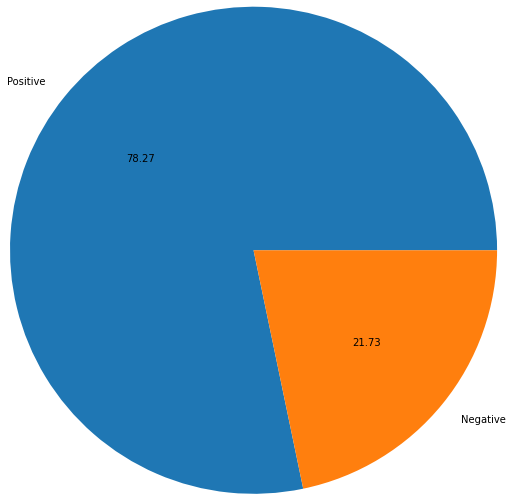

In [36]:
# draw a graph to display 
from matplotlib.pyplot import pie, axis, show

values= new_df['Results'].value_counts() #counting unique value frequency
labels= new_df['Results'].unique().tolist() #creating the unique value labels

plt.pie(values, labels=labels, radius=2.8, autopct='%.2f')
print(values)

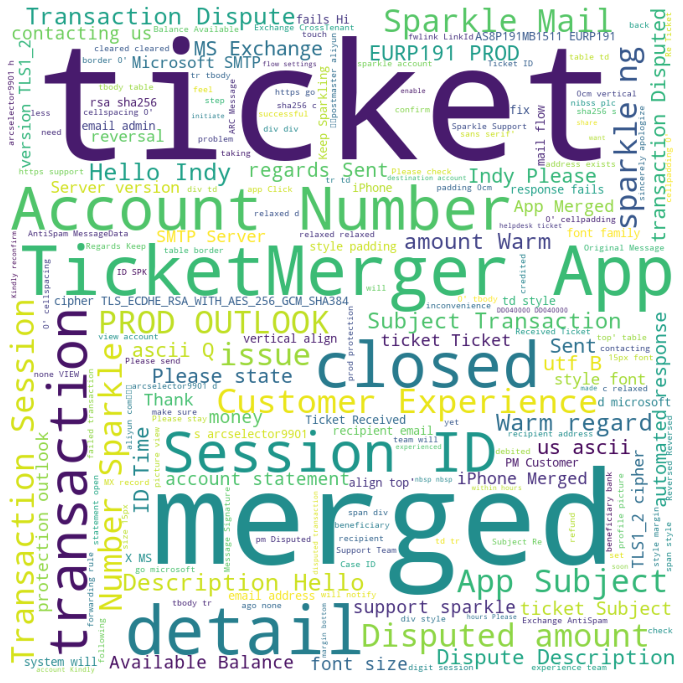

In [37]:
from wordcloud import WordCloud


# combine all text into one string
text = ' '.join(df['body_text'])

# create wordcloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)

# plot wordcloud
plt.figure(figsize=(12, 14))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
